In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import random

In [2]:
class DiscreteEnvironment():
    def __init__(self,start,stop):
        self.size=8
        self.grid=[[0 for i in range(self.size)] for j in range(self.size)]
        self.start=start
        self.state=self.start
        self.ter=stop
#         self.grid[7][7]=10
        self.non_reward=-0.5
        self.ter_reward=10
        #change probability structure
#         self.P=[[0.7,0.1,0.1,0.1],[0.1,0.7,0.1,0.1],[0.1,0.1,0.7,0.1],[0.1,0.1,0.1,0.7]]
        self.P=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
        self.gamma=0.9
#         self.actions=["up","down","right","left"]
        self.actions=[0,1,2,3]
    def step(self,action,update):
        temp_state=deepcopy(self.state)
        if(action==0):
            if(self.state[1]>0):
                temp_state[1]-=1
        if(action==1):
            if(self.state[1]<self.size-1):
                temp_state[1]+=1
        if(action==2):
            if(self.state[0]<self.size-1):
                temp_state[0]+=1
        if(action==3):
            if(self.state[0]>0):
                temp_state[0]-=1
#         if(update==1):
#             self.state=temp_state
        if(temp_state==self.ter):
            return temp_state,self.ter_reward,1
        return temp_state,self.non_reward,0
    def reset(self):
        self.state=self.start
#         self.grid=[[0 for i in range(self.size)] for j in range(self.size)]

In [3]:
class DiscreteAgent():
    def __init__(self,env):
        self.env=env
        self.sweep_no=0
        self.policy=[[1 for i in range(env.size)] for j in range(env.size)]
        self.another_policy=[0 for i in range(env.size)]
    def update(self):
            pass
    def get_action(self,state):
        pass

In [4]:
class ValueIteration(DiscreteAgent):
    def update(self):
        previousreward = deepcopy(self.env.grid)
        is_converged=False
        error=0
        for i in range(0,self.env.size):
            for j in range(0,self.env.size):
                values=[]
                for action in self.env.actions:
#                     print("krishna")
                    self.env.state=[i,j]
                    ans=0
                    for action1 in self.env.actions:
                        self.env.state=[i,j]
                        state,r,x=self.env.step(action1,0)
#                         print(str(action)+"->"+str(action1)+"->"+str(self.env.state)+"->"+str(state)+"->"+str(r)+"->"+str(self.env.P[action][action1]))
#                         print(self.env.P[action][action1])
                        ans+=self.env.P[action][action1]*(r+previousreward[state[0]][state[1]]*self.env.gamma)
#                         values.append(r+previousreward[state[0]][state[1]]*self.env.gamma)
                    values.append(ans)
#                     print(values)
                if([i,j]!=self.env.ter):
                    self.env.grid[i][j]=max(values)
                    self.policy[i][j]=values.index(max(values))
                error=max(error,abs(previousreward[i][j]-self.env.grid[i][j]))
        if(error<0.01):
            is_converged=True
        self.sweep_no+=1
        return self.sweep_no,is_converged
    def get_action(self,state):
        return self.policy[state[0]][state[1]]

In [5]:
env=DiscreteEnvironment([0,0],[7,7])
# print(env.grid)
agent=ValueIteration(env)
# agent=PolicyIteration(env)
# print(agent.sweep_no)
sweep_no, is_converged = 0, False
max_sweeps = 49
returns=[0 for i in range(max_sweeps+1)]
while sweep_no<max_sweeps:
    sweep_no,stop=agent.update()
    is_terminated=False
    state=env.start
    while not is_terminated:
        temp=state
        action = agent.policy[state[0]][state[1]]
        env.state=temp
        next_state, reward, is_terminated = env.step(action,0)
        if(next_state==temp):
#             print(sweep_no)
#             print("krishna")
            reward=-5
            returns[sweep_no]+=reward
            break
        returns[sweep_no]+=reward
#         print(reward)
        state=next_state
#         print(sweep_no)
print(returns)

[0, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]


In [6]:
# agent.evaluate_policy()
# while not is_converged:
while sweep_no<max_sweeps:
    sweep_no, is_converged = agent.update()
# print(env.grid)
# print(sweep_no)
print(agent.policy)

[[1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 1]]


In [7]:
class PolicyIteration(DiscreteAgent):
    def update(self):
        temp=deepcopy(self.policy)
        self.evaluate_policy()
        self.update_policy()
        self.sweep_no+=1
        if(self.policy==temp):
            return self.sweep_no,True
        return self.sweep_no,False
        
    def evaluate_policy(self):
        is_converged=False
        while(is_converged==False):
#         while(self.sweep_no<20):
            error=0
            previousreward = deepcopy(self.env.grid)
            for i in range(0,self.env.size):
                for j in range(0,self.env.size):
                    self.env.state=[i,j]
                    action=self.policy[i][j]
                    val=0
                    for action1 in self.env.actions:
                        self.env.state=[i,j]
                        state,r,x=self.env.step(action1,0)
                        val+=self.env.P[action][action1]*(r+previousreward[state[0]][state[1]]*self.env.gamma)
                    if([i,j]!=self.env.ter):
                        self.env.grid[i][j]=val
                    error=max(error,abs(previousreward[i][j]-self.env.grid[i][j]))
#             print(error)
            if(error<0.001):
                is_converged=True
    
    def update_policy(self):
        for i in range(0,self.env.size):
            for j in range(0,self.env.size):
                values=[]
                for action in self.env.actions:
                    val=0
                    for action1 in self.env.actions:
                        self.env.state=[i,j]
                        state,r,x=self.env.step(action1,0)
                        val+=self.env.P[action][action1]*(r+self.env.grid[state[0]][state[1]]*self.env.gamma)
                    values.append(val)
                self.policy[i][j]=values.index(max(values))
    def get_action(self,state):
        return self.policy[state[0]][state[1]]

In [8]:
env1=DiscreteEnvironment([0,0],[7,7])
agent1=PolicyIteration(env1)
i=0
stop=False
sweep_no=0
# max_sprint(hile(stop=False):
returns1=[0 for i in range(max_sweeps+1)]
while sweep_no<max_sweeps:
    sweep_no,stop=agent1.update()
    is_terminated=False
    state=env1.start
    while not is_terminated:
        temp=state
        action = agent1.policy[state[0]][state[1]]
        env1.state=temp
        next_state, reward, is_terminated = env1.step(action,0)
        if(next_state==temp):
#             print(sweep_no)
#             print("krishna")
            reward=-5
            returns1[sweep_no]+=reward
            break
        returns1[sweep_no]+=reward
#         print(reward)
        state=next_state
#         print(sweep_no)
print(returns1)


[0, -5, -5, -5, -5, -5, -5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]


In [9]:
print(agent1.policy)
# print(env1.grid)
c=[[ 0 for i in range(agent.env.size)]for i in range(agent.env.size)]
for i in range(8):
    for j in range(8):
        c[i][j]=agent.policy[i][j]-agent1.policy[i][j]
print(c)

[[1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


In [10]:
returns2=[0 for i in range(50)]
for i in range(50):
    is_terminated=False
    state=env1.start
    while not is_terminated:
        temp=state
        action = random.randint(0,3)
        env.state=temp
        next_state, reward, is_terminated = env.step(action,0)
#         print(str(state)+"->"+str(action)+"->"+str(next_state))
        returns2[i]+=reward
        state=next_state
print(returns2)

[-192.5, -503.5, -24.0, -176.0, -84.0, -16.5, -506.5, -45.5, -18.0, -31.0, -4.0, -27.0, -440.5, -5.0, -34.0, -29.5, -272.0, -224.5, -21.5, -32.5, -23.0, -50.0, -75.5, -76.5, -260.0, -205.0, -218.5, -132.5, -243.5, -12.5, -588.0, -87.5, -67.5, -455.0, -93.5, -297.5, -26.0, -203.5, -15.0, -418.5, -43.5, -311.5, -459.5, -536.5, -431.5, -54.0, -9.0, -53.0, -16.5, -74.0]


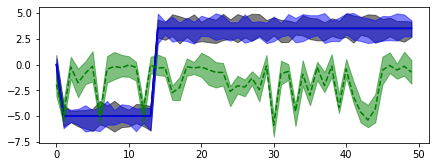

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
 
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)
returns=np.array(returns)
returns1=np.array(returns)
# generate 3 sets of random means and confidence intervals to plot
ub0 = returns + np.random.random(50) + .5
lb0 = returns - np.random.random(50) - .5
 
ub1 = returns1 + np.random.random(50) + .5
lb1 = returns1 - np.random.random(50) - .5
 
returns3 =np.array(returns2)/100
#Note:Random Agents returns scaled by 100 for better visualisation
ub2 = returns3 + np.random.random(50) + .5
lb2 = returns3 - np.random.random(50) - .5
 
# plot the data
fig = plt.figure(1, figsize=(7, 2.5))
plot_mean_and_CI(returns, ub0, lb0, color_mean='k', color_shading='k')
plot_mean_and_CI(returns1, ub1, lb1, color_mean='b', color_shading='b')
plot_mean_and_CI(returns3, ub2, lb2, color_mean='g--', color_shading='g')


# States
    {i,j} where i=[0,20],j=[0,20]
    0 is dummy state introduced for conveinience
    where i is number of cars in location1 and j is number of cars in location2
# Actions
    actions in state A=[-5,5]
    Here maximum number of cars that can be moved from one location to other
    Instead of having two numbers to know from which location we moved to which location,
    We maintain a single number,negative quantity represents moving from location2 to location1 and vice versa
# Rewards
    r(s',a,s)=min(ren1,s[0]-a)+min(ren2,s[1]+a)*c
    where ren1=no of cars given for rent at location1
          ren2=no of cars given for rent at location2
          s[0] is number of cars at location1
          s[1] is number of cars at location2
# Transitions
    p({s[0]-a-ren1+ret1,s[0]+a-ren2+ret2}/s,a)=poisson(ren1,f_req)*poisson(ren2,s_req)*poisson(ret1, f_ret)*poisson(ret2, s_ret)
    where 
    ren1=no of cars given for rent at location1=min(asked for rent,available after taking action a)
    ren2=no of cars given for rent at location2=min(asked for rent,available after taking action a)
    ret1=no of cars returned at location1
    ret2=no of cars returned at location2
    poisson(ren1,f_req) is probability of poission distribution for value ren1 where lambda=f_req
    poisson(ren1,f_req) is probability of poission distribution for value ren2 where lambda=s_req
    poisson(ren1,f_req)  is probability of poission distribution for value ret1 where lambda=f_ret
    poisson(ren1,f_req) is probability of poission distribution for value ret2 where lambda=s_ret
    and f_ren,s_ren,f_ret,s_ret are given
# Bellman update equation
    let c1=a+ren1-ret1
        c2=a-ren2+ret2
        P=p({s[0]-c1,s[1]+c2}/s,a}
       Policy evaluation update:
         where a=poilcy(s)
   $$v(s)=  \{P*(r(s',a,s)+v(s'))\} $$
       Policy update equation:
   $$policy(s)=(a) for \max_{\forall a \in A}  \{P*(r(s',a,s)+v(s'))\} $$

In [108]:
import  math
class CarEnvironment():
    def __init__(self):
        self.maxcars=20
        self.maxmove=5
        self.f_req=3
        self.s_req=4
        self.f_ret=3
        self.s_ret=2
        self.rent=10
        self.cost=-2
        self.up=9
        self.prob=dict()
        self.state=[0,0]
        self.grid=[[0 for i in range(self.maxcars+1)] for j in range(self.maxcars+1)]
        self.size=self.maxcars+1
        self.actions=[i for i in range(-self.maxmove,self.maxmove+1)]
        self.gamma=0.9
    #precalculating and storing in dictionary as this is required so many number of times and will become time consuming
    def poisson(self,x, l):
        key = x * 10 + l
        if key not in self.prob.keys():
            self.prob[key] = np.exp(-l) * pow(l, x) / math.factorial(x)
        return self.prob[key]

In [109]:
class PolicyIteration2(DiscreteAgent):
    def update(self):
        temp=deepcopy(self.policy)
#         print("krishna1")
        self.evaluate_policy()
#         print("krishna2")
        self.update_policy()
#         print("krishna3")
        self.sweep_no+=1
        if(self.policy==temp):
            return self.sweep_no,True
#         print("krishna4")
        return self.sweep_no,False
        
    def evaluate_policy(self):
        is_converged = False
        #no of iterations to run for evaluating policy
        sweep=0
        while(sweep<30):
#             print("kmt1")
            error=0
            #storing current environment state
            prevstate=deepcopy(self.env.grid)
            for i in range(self.env.size):
                for j in range(self.env.size):
#                     print("kmt2")
                    self.env.state=[i,j]
                    action=self.policy[i][j]
                    returns=0
                    #max cars at that location cant exceed 20
                    cars1 = int(min(self.env.state[0] - action, self.env.maxcars))
                    cars2 = int(min(self.env.state[1] + action, self.env.maxcars))
                    #checking for all possibilities of number of cars that could be rented(as poisson has all probabilties to infinity neglecting probabilities after 9)
                    for ren1 in range(0, self.env.up):
                        for ren2 in range(0, self.env.up):
#                             print("kmt3")
                            rentprob = self.env.poisson(ren1, self.env.f_req) * self.env.poisson(ren2, self.env.s_req)
                            totalren1 = min(cars1, ren1)
                            totalren2 = min(cars2, ren2)
                            rew = ((totalren1 + totalren2) * self.env.rent+self.env.cost* abs(action))*rentprob
                    #checking for all possibilities of no of cars returned as to know the next state
                            for ret1 in range(0, self.env.up):
                                for ret2 in range(0, self.env.up):
#                                     print("kmt4")
                                    retprob = self.env.poisson(ret1, self.env.f_ret) * self.env.poisson(ret2,self.env.s_req)
                                    prob=retprob*rentprob
                                    cars1_end = min(cars1 - totalren1 + ret1, self.env.maxcars)
                                    cars2_end = min(cars2 - totalren2 + ret2, self.env.maxcars)
                            #rew is r(s,a) and returns is total value of state
                                    returns += retprob * rew + prob*(self.env.gamma* prevstate[cars1_end][cars2_end])
                            self.env.grid[i][j]=returns
                            error=max(error,abs(prevstate[i][j]-self.env.grid[i][j]))
            sweep+=1
            if(error<0.01):
                is_converged=True
    def update_policy(self):
        for i in range(0,self.env.size):
            for j in range(0,self.env.size):
                vals = []
                #for all states checking which action gives maximum possible value
                for action in self.env.actions:
                    #taking only for possible actions because you cannot move more than nof of cars at that state
                    if ((action >= 0 and i >= action) or (action < 0 and j >= abs(action))):
                        self.env.state=[i,j]
                        returns=0
                        cars1 = int(min(self.env.state[0] - action, self.env.maxcars))
                        cars2 = int(min(self.env.state[1] + action, self.env.maxcars))
                        for ren1 in range(0, self.env.up):
                            for ren2 in range(0, self.env.up):
                                rentprob = self.env.poisson(ren1, self.env.f_req) * self.env.poisson(ren2, self.env.s_req)
                                totalren1 = min(cars1, ren1)
                                totalren2 = min(cars2, ren2)
                                rew = ((totalren1 + totalren2) * self.env.rent+self.env.cost* abs(action))*rentprob
                                for ret1 in range(0, self.env.up):
                                    for ret2 in range(0, self.env.up):
                                        retprob = self.env.poisson(ret1, self.env.f_ret) * self.env.poisson(ret2,self.env.s_req)
                                        prob=retprob*rentprob
                                        cars1_end = min(cars1 - totalren1 + ret1, self.env.maxcars)
                                        cars2_end = min(cars2 - totalren2 + ret2, self.env.maxcars)
                                        returns += retprob * rew + prob*(self.env.gamma* self.env.grid[cars1_end][cars2_end])
                        vals.append(returns)
                bestAction = vals.index(max(vals))
                self.policy[i] [j] = self.env.actions[bestAction] 
    def get_action(self,state):
        return self.policy[state[0]][state[1]]

In [110]:
env4=CarEnvironment()
agent4=PolicyIteration2(env4)
is_converged=False
sweep_no=0
max_sweeps=1
while not is_converged:
    sweep_no,is_converged=agent4.update()
    

krishna1
krishna2
krishna3
krishna4
krishna1
krishna2
krishna3
krishna4
krishna1
krishna2
krishna3
krishna4
krishna1
krishna2
krishna3


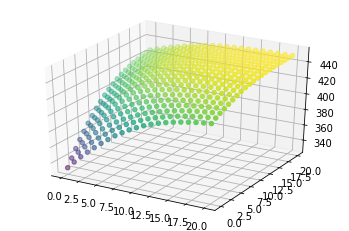

In [112]:
# print(env4.grid)
# print(agent4.policy)
# import numpy
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = []
x_points = []
y_points = []
for i in range(21):
    for j in range(21):
        x_points.append(i)
        y_points.append(j)
        z_points.append(env4.grid[i][j])
ax.scatter3D(x_points, y_points, z_points, c=z_points);
plt.show()
#similarly plot for policy also

# States
    {1,2,..99}
    but as you told i added two dummy states for convinience 0 and 100
# Actions
    actions in state A_s={0,1,..min(s,100-s)}
# Rewards
    r(s',a,s)=1 if s'=100
             =0 otherwise
# Transitions
    p(s+a/s,a)=ph
    p(s-a/s,a)=1-ph
    where ph= probability of getting heads on a toss
# Bellman update equation
   $$v(s)=\max_{\forall a \in A_s}  \{ph*(reward[s+a]+v(s+a))+(1-ph)*(reward[s-a]+v(s-a))\} $$

In [118]:
class Gamble_environment():
    def __init__(self,ph):
        self.grid=[0 for i in range(101)]
        self.state=1
        self.p=ph
        self.ter=100
        self.size=101
        self.actions=[i for  i in range(101)]
        self.rewards=[0 for i in range(101)]
        self.rewards[100]=1
        self.gamma=1

In [119]:
class ValueIteration1(DiscreteAgent):
    def update(self):
        previous = deepcopy(self.env.grid)
        is_converged=False
        error=0
        for i in range(self.env.size):
            values=[]
            for action in self.env.actions:
                ans=0
                if(action in range(1,min(i,100-i)+1)):
                    self.env.state=i
                    ans+=self.env.p*(self.env.rewards[i+action]+previous[i+action]*self.env.gamma)+(1-self.env.p)*(self.env.rewards[i-action]+previous[i-action]*self.env.gamma)
                    values.append(ans)
            if(i!=self.env.ter and i!=0):
                self.env.grid[i]=max(values)
            error=max(error,abs(previous[i]-self.env.grid[i]))
        if(error<0.0001):
            is_converged=True
        self.sweep_no+=1
        return self.sweep_no,is_converged
    def get_action(self,state):
#         for state in range(1,101):
        cur=self.env.grid
        p=self.env.p
        val=0
        r=0
        for action in self.env.actions:
            if(action <=min(state,100-state) and action>=1):
                ans=(p*(self.env.rewards[state+action]+cur[state+action])+(1-p)*(self.env.rewards[state-action]+cur[state-action]))
                if(ans>val):
                    val=ans
                    r=action
        return r

In [120]:
env2=Gamble_environment(0.25)#change value to 0.15 and 0.65 for their plots
# print(env.grid)
agent2=ValueIteration1(env2)
sweep_no, is_converged = 0, False
max_sweeps = 1000
while not is_converged:
# while sweep_no<max_sweeps:
    sweep_no, is_converged = agent2.update()
# print(env2.grid)(
policy=[]
for i in range(1,101):
#     agent2.another_policy=agent2.get_action(i)
    policy.append(agent2.get_action(i))
print(policy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


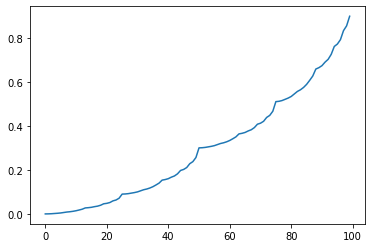

In [17]:
x = range(100)
y = env2.grid[:100]
 
plt.plot(x, y)
 
plt.show()

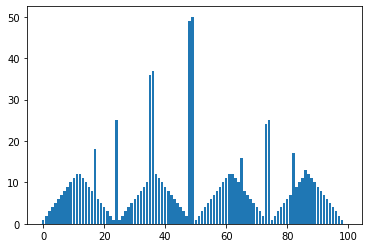

In [18]:
x = range(100)
y = policy
plt.bar(x, y)
plt.show()


yes the policy is stable even as theta tends to zero